# 基于 K-means 的文本聚类

In [1]:
from cluster import *

[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. 数据预处理：去除停用词、数字、符号等，提取文本特征。
去除符号数字和停用词之后的样本如下所示

In [2]:
x, y, data=tf_idf()
data[0]

100%|██████████████████████████████████████████████████████████████████████████| 11314/11314 [00:09<00:00, 1238.56it/s]


'lerxst wam umd edu thing Subject car Nntp Posting Host rac wam umd edu Organization University Maryland College Park Lines wondering anyone could enlighten car saw day door sports car looked late early called Bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail Thanks IL brought neighborhood Lerxst'

## 2. 特征向量化：将预处理后的文本使用 TF-IDF 方法进行向量化。
使用TF-IDF得到每一条文本的稀疏向量表示，如下所示

In [3]:
print(x[0])

  (0, 13694)	0.1636932110088248
  (0, 2521)	0.11637615867484091
  (0, 9810)	0.12161789454499797
  (0, 20407)	0.0685659617863855
  (0, 12244)	0.07443413713270951
  (0, 15421)	0.06898240231573635
  (0, 12012)	0.0859550184849778
  (0, 8132)	0.19392649547725513
  (0, 10137)	0.09091920170120554
  (0, 22365)	0.10210705761767103
  (0, 9345)	0.10373535615657799
  (0, 12206)	0.07887123833351098
  (0, 15948)	0.13470204228360008
  (0, 22897)	0.07538581510951689
  (0, 19115)	0.13492375247092855
  (0, 6680)	0.12074201796322959
  (0, 13554)	0.08691606648034822
  (0, 13120)	0.11003665784888819
  (0, 11290)	0.053237826802890784
  (0, 2229)	0.10837140672533854
  (0, 17183)	0.1016615554267689
  (0, 18255)	0.12279349206539338
  (0, 2628)	0.16523140103484685
  (0, 8055)	0.10758047319358022
  (0, 244)	0.11862730104608663
  :	:
  (0, 5978)	0.14339282711244597
  (0, 2802)	0.0859550184849778
  (0, 6269)	0.10516146286358587
  (0, 11515)	0.11469773267003772
  (0, 12011)	0.11242614098542385
  (0, 19214)	0.134482

## 3. K-means 模型训练：根据设定的 K 值，构建 K-means 模型，并对向量化的文本数据进行聚类。
尝试使用了多个K进行聚类，发现随着K的增加，轮廓系数增加，CH指数减少。推测原因如下

1. 轮廓系数越高，意味着簇内样本的距离越近，簇间样本距离越远。聚类的簇增加了，使得整个样本空间被分成多个更小的簇，并且每个簇内部更紧密。
2. CH指数是簇之间的协方差除以簇内部的协方差，类别内部数据的协⽅差越⼩越好，类别之间的协⽅差越⼤越好。簇增加了并没有使得CH指数增加，可能是因为样本的特征重合度太高，也就是TF-IDF作为特征不足以区分这些文本信息。

表格中20\*代表着直接将20个原始标签作为聚类的簇标签，来计算的轮廓系数与CH指数，可以看到得分并不高，这说明TF-IDF值可能并不是一个好的特征选择，通过它并不能很好地区分文本的主题。

|K|轮廓系数|CH指数|
| :---- | :---- | :---- |
|10|0.0049|21.6258|
|15|0.0063|18.7314|
|20|0.0082|17.7699|
|20*|0.0066|13.5123|
|25|0.0091|16.8757|
|30|0.0099|15.6913|
|35|0.0110|14.8219|
|40|0.0119|13.9954|
|60|0.0154|12.2625|


In [4]:
y_pred = k_means(25, x)

In [5]:
# 计算轮廓系数
metrics.silhouette_score(x.toarray(), y_pred)

0.009091281147628307

In [6]:
# 计算CH指数
metrics.calinski_harabasz_score(x.toarray(), y_pred)

16.875723338821008

## 5. 可视化：使用降维方法（如 PCA 或 t-SNE）将高维数据降维至 2 D 或 3 D，然后进行可视化，观察聚类效果。
使用 t-SNE进行2D的降维。

In [7]:
ts = manifold.TSNE(n_components=2, init='pca', random_state=0)
x_ts = ts.fit_transform(x.toarray())
x_min, x_max = x_ts.min(0), x_ts.max(0)
x_final = (x_ts - x_min) / (x_max - x_min)

使用matplotlib.pyplot进行可视化

从可视化的结果来看，簇与簇之间并不都能完全分离，其中有能够分离的簇，例如紫色和绿色，但有较多的簇难以分离，例如黄色和蓝色

(([], []), ([], []))

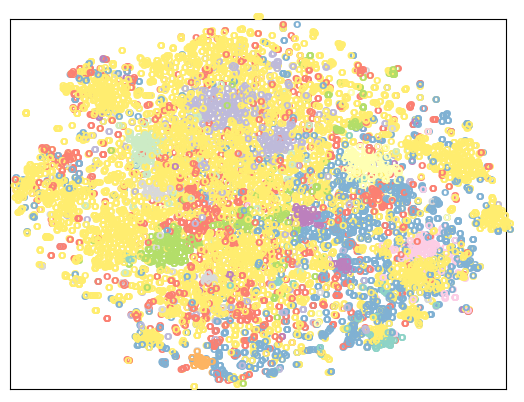

In [8]:
plt.figure()
ax = plt.subplot(111)
for i in range(x_final.shape[0]):
    plt.text(x_final[i, 0], x_final[i, 1], 'o',
             color=plt.cm.Set3(y_pred[i]),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([]), plt.yticks([])